In [1]:
import numpy as np # linear algebra
import pandas as pd

df = pd.read_csv('/content/Top_1000_Companies_Dataset.csv')
df.head()

,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,keywords,LeadInvestors,Accelerator,btype,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",NaN,NaN,2.900000e+10,$11B,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118%,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,NaN,"Lightspeed, Silver Lake",NaN,NaN,1.020000e+10,$564M,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134%,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,...,NaN,Altimeter,NaN,NaN,4.200000e+09,$414.4M,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76%,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,United States,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,...,saas,L2 Point,NaN,NaN,1.100000e+09,$286.2M,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60%,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,United States,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,...,NaN,DST Global,NaN,NaN,3.700000e+09,$484.7M,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97%,For Contact Direct Phone Numbers and Emails se...


Descriptive Statistics

In [2]:

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company_name        1000 non-null   object 
 1   url                 999 non-null    object 
 2   city                999 non-null    object 
 3   state               812 non-null    object 
 4   country             994 non-null    object 
 5   employees           1000 non-null   int64  
 6   linkedin_url        997 non-null    object 
 7   founded             791 non-null    float64
 8   Industry            997 non-null    object 
 9   GrowjoRanking       1000 non-null   int64  
 10  Previous Ranking    1000 non-null   int64  
 11  estimated_revenues  972 non-null    float64
 12  job_openings        938 non-null    float64
 13  keywords            368 non-null    object 
 14  LeadInvestors       424 non-null    object 
 15  Accelerator         12 non-null     object 
 16  btype  

,employees,founded,GrowjoRanking,Previous Ranking,estimated_revenues,job_openings,valuation
count,1000.000000,791.000000,1000.000000,1000.000000,9.720000e+02,938.000000,4.680000e+02
mean,319.579000,2012.544880,500.500000,504.007000,1.380356e+08,8.573561,2.259308e+09
std,232.428007,12.326577,288.819436,290.629204,8.448706e+08,28.327318,4.708617e+09
min,22.000000,1854.000000,1.000000,1.000000,1.518000e+06,1.000000,1.000000e+06
25%,130.750000,2012.000000,250.750000,252.750000,2.436000e+07,1.000000,8.975000e+08
50%,246.000000,2015.000000,500.500000,504.500000,4.742900e+07,1.000000,1.200000e+09
75%,466.500000,2017.500000,750.250000,754.250000,9.779318e+07,5.000000,2.011000e+09
max,995.000000,2022.000000,1000.000000,1007.000000,2.068482e+10,660.000000,5.302100e+10


Data Preprocessin

Check for Duplicates

In [4]:
duplicated_data = df.duplicated().any()
duplicated_data


False

Check for Missing Values¶


In [5]:
df.isnull().sum()

,0
company_name,0
url,1
city,1
state,188
country,6
employees,0
linkedin_url,3
founded,209
Industry,3
GrowjoRanking,0


In [6]:
#drop accelerator, btype
df = df.drop(['Accelerator', 'btype'], axis=1)

Data Conversion¶


In [7]:
#Convert growth_percentage to float
df['growth_percentage'] = df['growth_percentage'].str.rstrip('%').astype(float)

In [8]:
import re

def convert_funding_to_numeric(funding_str):
    if pd.isnull(funding_str):
        return None

    match = re.match(r'^([€£$CA])([\d.]+)[MB]$', funding_str)
    if match:
        currency, value = match.group(1), float(match.group(2))
        multiplier = 1e9 if 'B' in funding_str else 1e6
        conversion = {'$': 1, 'CA': 1, '€': 1.2, '£': 1.4}
        return value * multiplier * conversion.get(currency, 0)
    return None

df['total_funding'] = df['total_funding'].apply(convert_funding_to_numeric)
df.head()


,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,estimated_revenues,job_openings,keywords,LeadInvestors,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",2.900000e+10,1.100000e+10,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118.0,For Contact Direct Phone Numbers and Emails se...
1,Alchemy,alchemy.com,San Francisco,CA,United States,201,http://www.linkedin.com/company/alchemyinc,NaN,Fintech,2,...,39269750.0,1.0,NaN,"Lightspeed, Silver Lake",1.020000e+10,5.640000e+08,https://www.growjo.com/company/Alchemy,https://www.indeed.com/jobs?q=company%3A(Alchemy),134.0,For Contact Direct Phone Numbers and Emails se...
2,dbt Labs,getdbt.com,Philadelphia,PA,United States,511,http://www.linkedin.com/company/dbtlabs,2016.0,Analytics,3,...,76987400.0,1.0,NaN,Altimeter,4.200000e+09,4.144000e+08,https://www.growjo.com/company/dbt_Labs,https://www.indeed.com/jobs?q=company%3A(dbt L...,76.0,For Contact Direct Phone Numbers and Emails se...
3,Wasabi Technologies,wasabi.com,Boston,MA,United States,355,http://www.linkedin.com/company/wasabitechnolo...,2017.0,Cloud,4,...,38480000.0,4.0,saas,L2 Point,1.100000e+09,2.862000e+08,https://www.growjo.com/company/Wasabi_Technolo...,https://www.indeed.com/jobs?q=company%3A(Wasab...,60.0,For Contact Direct Phone Numbers and Emails se...
4,Whatnot,whatnot.com,Los Angeles,CA,United States,551,http://www.linkedin.com/company/whatnot-inc,2019.0,eCommerce,5,...,39664000.0,1.0,NaN,DST Global,3.700000e+09,4.847000e+08,https://www.growjo.com/company/Whatnot,https://www.indeed.com/jobs?q=company%3A(Whatnot),97.0,For Contact Direct Phone Numbers and Emails se...


Data Visualization

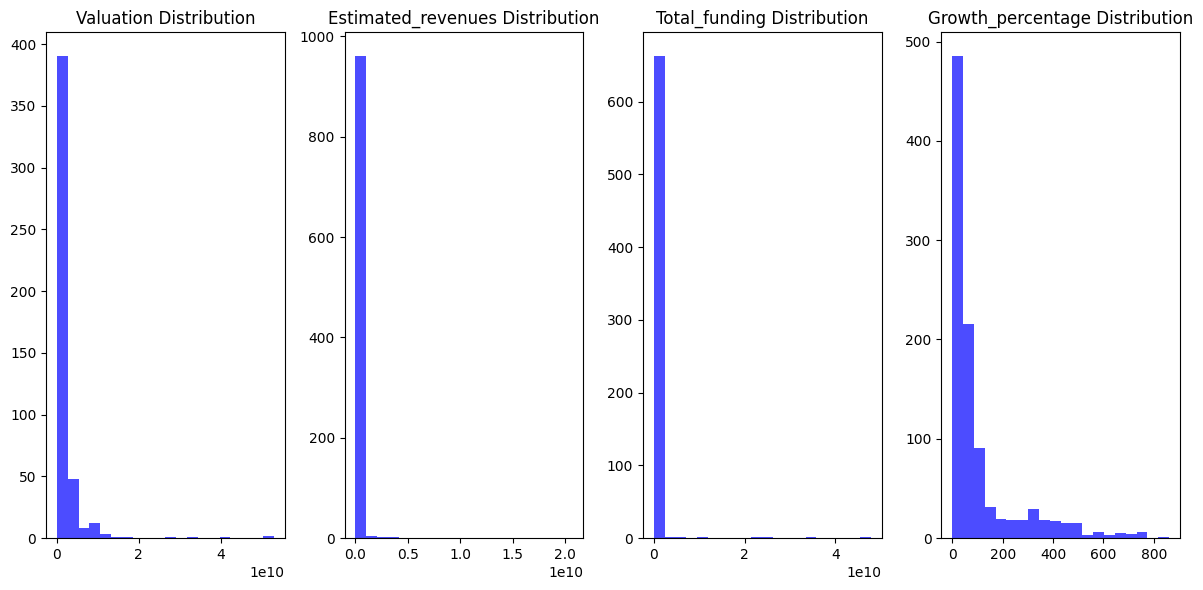

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['valuation', 'estimated_revenues', 'total_funding', 'growth_percentage']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(1, 4, i)
    plt.hist(df[feature].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f'{feature.capitalize()} Distribution')
plt.tight_layout()
plt.show()


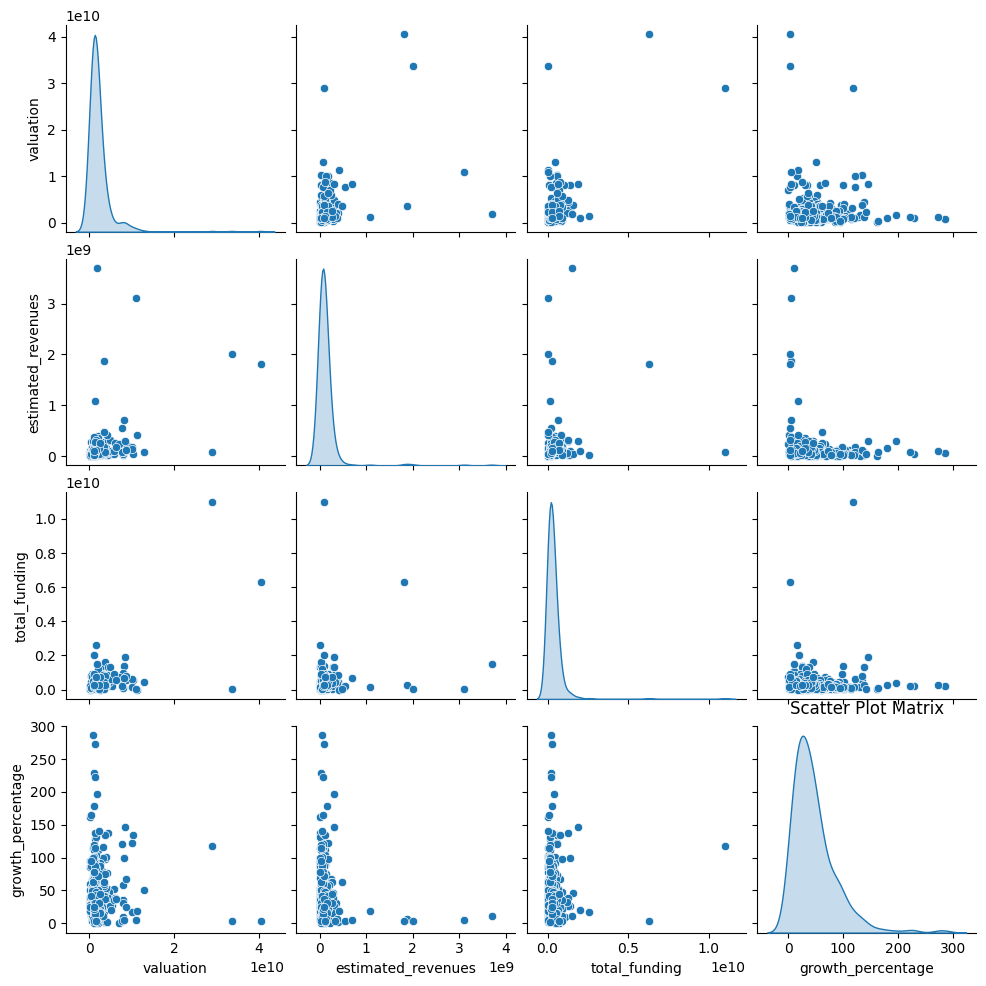

In [10]:
#Scatter plot
sns.pairplot(df[features].dropna(), diag_kind='kde')
plt.title('Scatter Plot Matrix', y=1.02)
plt.show()

Industry Analysis

1. Distribution of Companies Across Industries ¶


In [11]:
import plotly.express as px
industry_df = df['Industry'].value_counts().reset_index()
industry_df.columns = ['Industry', 'Company Counts']

fig = px.treemap(industry_df, path=['Industry'], values='Company Counts', title='Distribution of Companies Across Industries')
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show()


2. Top Industries by Valuation ¶


<ipython-input-12-566be47b71f7>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




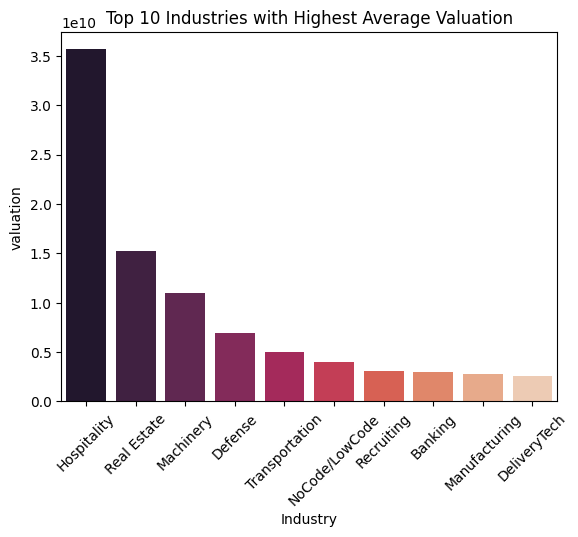

In [12]:
top_industries = df.groupby('Industry')['valuation'].mean().nlargest(10).reset_index()

sns.barplot(data=top_industries, x='Industry', y='valuation', palette='rocket')
plt.title('Top 10 Industries with Highest Average Valuation')
plt.xticks(rotation=45)
plt.show()


3. Valuation Distribution by Industry

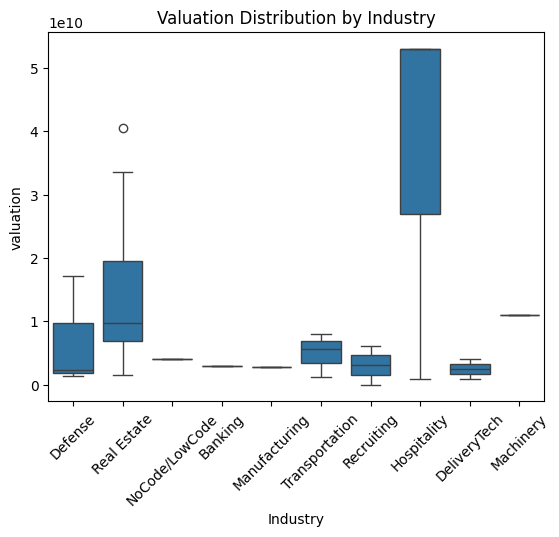

In [13]:
sns.boxplot(data=df[df['Industry'].isin(top_industries['Industry'])], x='Industry', y='valuation')
plt.xticks(rotation=45)
plt.title('Valuation Distribution by Industry')
plt.show()


Company Analysis

<ipython-input-15-58afbead79aa>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-15-58afbead79aa>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-15-58afbead79aa>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




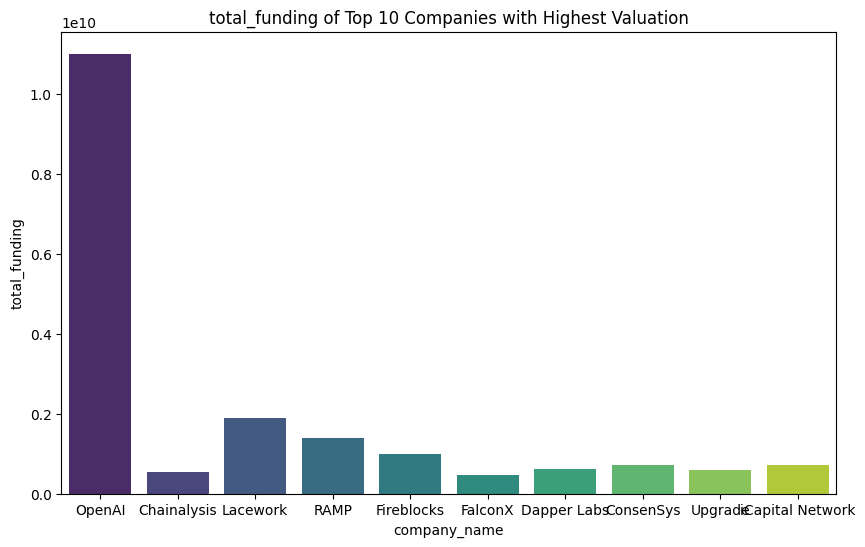

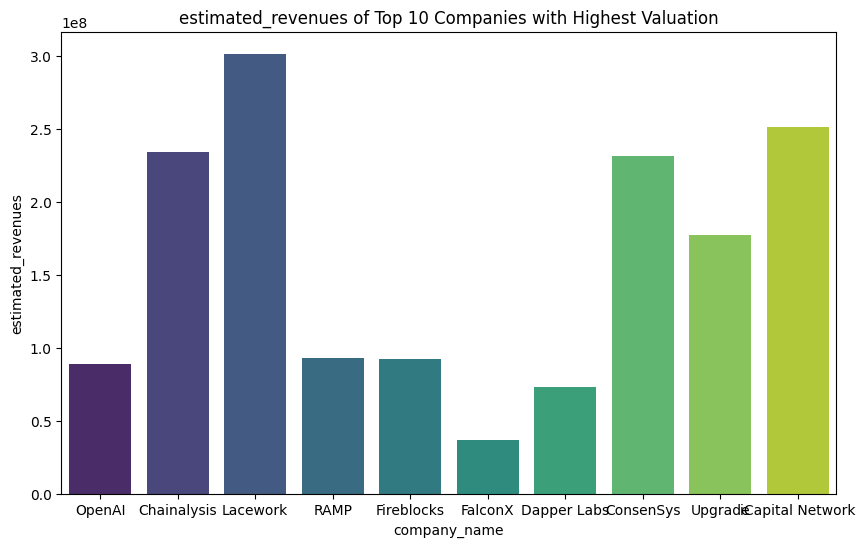

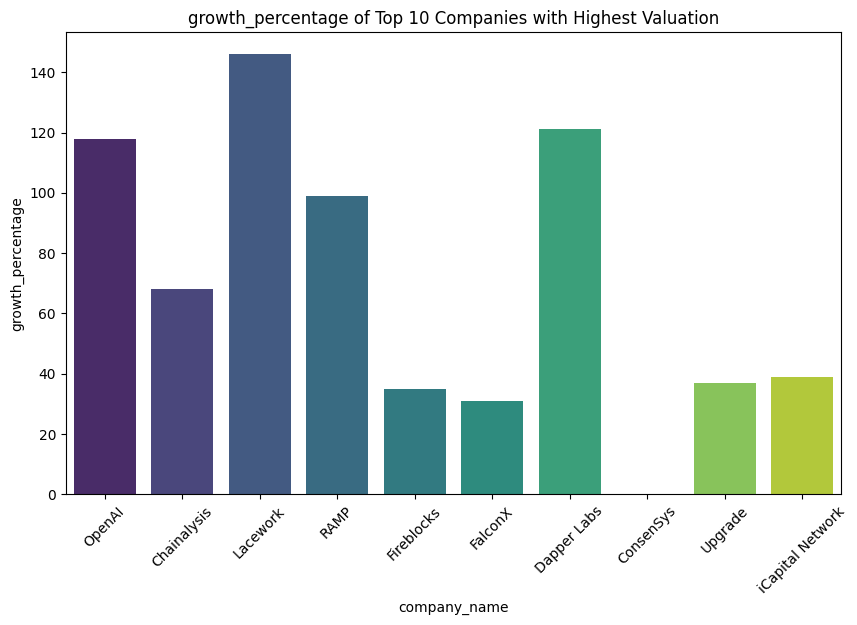

In [15]:
#Top 10 companies with highest valuation
key_features = ['total_funding', 'estimated_revenues', 'growth_percentage']
top_10_company = df.dropna().nlargest(10, 'valuation')
for i in key_features:
    plt.figure(figsize=(10,6))
    sns.barplot(data=top_10_company, x='company_name', y=i, palette='viridis')
    plt.title(f'{i} of Top 10 Companies with Highest Valuation')
plt.xticks(rotation=45)
plt.show()

eography Analysis

1. Distribution of Companies by City, State and Country

In [16]:
df['country'] = df['country'].replace('USA', 'United States')
geo_df = df.groupby(['country', 'state', 'city']).size().reset_index(name='count')

fig = px.treemap(geo_df, path=['country', 'state', 'city'], values='count',
                 labels={'city': 'City', 'state':'State','country':'Country', 'count':'Number of Companies'},
                 title='Hierarchical Treemap: Companies by Country, State, and City')

fig.show()

In [17]:
top_countries = df.groupby('country')['valuation'].sum().nlargest(20).reset_index()
company_count = df['country'].value_counts().reset_index(name='company_count')
top_countries = top_countries.merge(company_count, on='country')

fig = px.choropleth(top_countries, locations='country', locationmode='country names', color='valuation',
                    hover_name='country', hover_data=['company_count'], color_continuous_scale='Plasma',
                    title='Choropleth Map of Top 20 Countries by Total Valuation')

fig.update_traces(hovertemplate='<b>%{hovertext}</b><br>Valuation: $%{z:.2f}<br>Company Count: %{customdata}')
fig.show()


Correlation between features

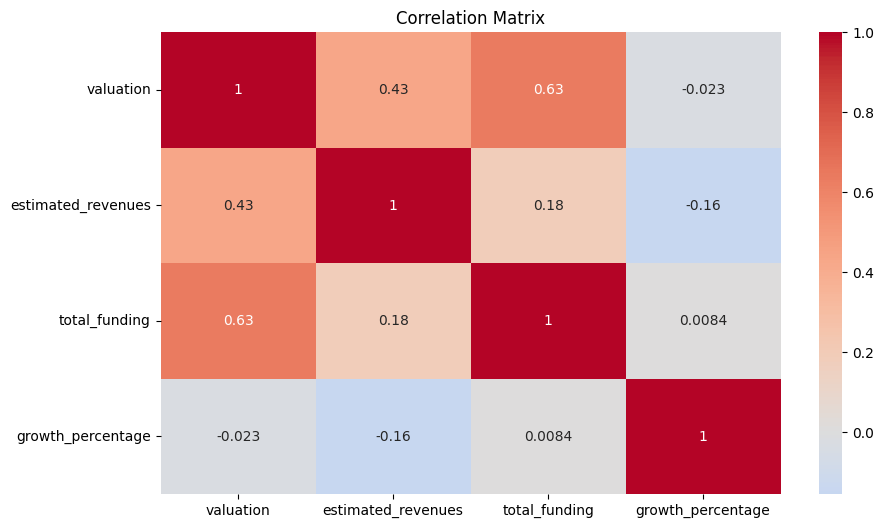

In [18]:
# Correlation
corr_matrix = df[features].dropna().corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Portfolio Building

1. Define Investment Criteria

In [19]:
# Define criteria
port_criteria = ['company_name', 'valuation', 'growth_percentage']

In [22]:
min_valuation = 10e9
min_growth_rate = 20
top_industries = ['Fintech', 'E-commerce', 'Artificial intelligence']  # Example industries

# Filter the DataFrame
filtered_df = df[
    (df['valuation'] >= min_valuation) &
    (df['growth_percentage'] >= min_growth_rate) &
    (df['Industry'].isin(top_industries))
]

filtered_df[port_criteria]

,company_name,valuation,growth_percentage
1,Alchemy,1.020000e+10,134.0
114,Polygon,1.300000e+10,50.0


Sort and Rank

Rank the filtered companies based on the criteria defined above.

In [24]:
# Filter and sort companies
port_company = df.sort_values(by=port_criteria, ascending=False).head(10)

Diversification

Diversify portfolio by selecting companies from different industries or sectors. Diversification helps manage risk and can provide a more balanced portfolio.

In [27]:

grouped = df.groupby('Industry')
def top_company(group):
    return group.nlargest(1, 'valuation')  # Select based on valuation
top_companies = grouped.apply(top_company)

top_companies

<ipython-input-27-927cd637717a>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,,company_name,url,city,state,country,employees,linkedin_url,founded,Industry,GrowjoRanking,...,estimated_revenues,job_openings,keywords,LeadInvestors,valuation,total_funding,product_url,indeed_url,growth_percentage,contact_info
Industry,,,,,,,,,,,,,,,,,,,,,,
3D,697,Xometry,xometry.com,Gaithersburg,MD,United States,592,http://www.linkedin.com/company/xometry,2013.0,3D,698,...,189220000.0,84.0,"Cleantech,Consumer Services,Manufacturing,Sola...",BMW i Ventures,2.527000e+09,1.972000e+08,https://www.growjo.com/company/Xometry,https://www.indeed.com/jobs?q=company%3A(Xometry),22.0,For Contact Direct Phone Numbers and Emails se...
AI,0,OpenAI,openai.com,San Francisco,CA,United States,655,http://www.linkedin.com/company/openai,2015.0,AI,1,...,88722200.0,25.0,"Artificial Intelligence, Online Gaming, Non Pr...","Thrive, Founders Fund",2.900000e+10,1.100000e+10,https://www.growjo.com/company/OpenAI,https://www.indeed.com/jobs?q=company%3A(OpenAI),118.0,For Contact Direct Phone Numbers and Emails se...
AdTech,149,Swiftly,swiftly.com,Seattle,WA,United States,119,http://www.linkedin.com/company/swiftlysystems,NaN,AdTech,150,...,20000000.0,1.0,NaN,BRV Capital Management,1.000000e+09,NaN,https://www.growjo.com/company/Swiftly,https://www.indeed.com/jobs?q=company%3A(Swiftly),53.0,For Contact Direct Phone Numbers and Emails se...
Adtech,820,VideoAmp,videoamp.com,Los Angeles,CA,United States,519,http://www.linkedin.com/company/videoamp,2014.0,Adtech,821,...,110744000.0,1.0,"Advertising, Television, Advertising Platforms...",NaN,1.400000e+09,4.566000e+08,https://www.growjo.com/company/VideoAmp,https://www.indeed.com/jobs?q=company%3A(Video...,36.0,For Contact Direct Phone Numbers and Emails se...
Advertising,472,Vinosha Portfolio Pvt.Ltd.,vinosha.in,NOIDA,UTTARPRADESH,India,391,http://www.linkedin.com/company/vinosha-portfo...,2014.0,Advertising,473,...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Vinosha_Portfol...,https://www.indeed.com/jobs?q=company%3A(Vinos...,484.0,For Contact Direct Phone Numbers and Emails se...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Video,112,Cloudinary,cloudinary.com,Santa Clara,CA,United States,475,http://www.linkedin.com/company/cloudinary,2012.0,Video,113,...,74048000.0,1.0,"saas, Consulting,,Cloud Computing,Customer Sup...",Blackstone,2.000000e+09,1.000000e+08,https://www.growjo.com/company/Cloudinary,https://www.indeed.com/jobs?q=company%3A(Cloud...,6.0,For Contact Direct Phone Numbers and Emails se...
Warehousing,927,Trader Joes,traderjoes.com,Monrovia,CA,United States,175,http://www.linkedin.com/company/trader-joes,NaN,Warehousing,928,...,NaN,1.0,NaN,NaN,NaN,NaN,https://www.growjo.com/company/Trader_Joes,https://www.indeed.com/jobs?q=company%3A(Trade...,1.0,For Contact Direct Phone Numbers and Emails se...
Wireless,24,Tarana Wireless,taranawireless.com,Milpitas,CA,United States,412,http://www.linkedin.com/company/tarana-wireles...,2009.0,Wireless,25,...,182245000.0,10.0,"Cleantech,Mobile,Telecommunications,Wind Power","Axon Capital, Khosla Ventures, Movers Lab",1.000000e+09,2.061000e+08,https://www.growjo.com/company/Tarana_Wireless,https://www.indeed.com/jobs?q=company%3A(Taran...,45.0,For Contact Direct Phone Numbers and Emails se...


Calculate Allocation

Calculate the allocation for each company. Allocation refers to the portion of your total investment that you'll allocate to each company in the portfolio. This step helps distribute the investment across different companies based on their valuations.

In [42]:
total_invest = 1000000
port_company['allocation'] = (port_company['valuation']/port_company['valuation'].sum()) * total_invest

print("\nAllocation for Each Company:")
print(port_company[['company_name', 'allocation']])


Allocation for Each Company:
         company_name     allocation
421           solo.io   79365.079365
257             inkuA            NaN
283        reMarkable   79365.079365
431  iCapital Network  476190.476190
265             wefox  357142.857143
183        prezent.ai    7936.507937


 Calculating Log Returns and Portfolio Metrics

Log returns are used to measure the percentage change in the value of an investment over time.

Portfolio expected return and volatility are crucial metrics in portfolio analysis. Expected return shows the potential profit or loss, while volatility measures the degree of risk or uncertainty associated with the portfolio.

In [44]:
from scipy.optimize import minimize

log_returns = np.log(1 + port_company['growth_percentage'] / 100)
weights = port_company['allocation'] / total_invest
portfolio_return = np.sum(weights * log_returns.mean())
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(log_returns, rowvar=False), weights)))

print(f"\nPortfolio Expected Return: {portfolio_return}\nPortfolio Volatility: {portfolio_volatility}")



Portfolio Expected Return: 0.765445477721924
Portfolio Volatility: nan


Objective Function for Portorlio Optimization

Define the objective function to optimize. In this case, we're maximizing the Sharpe Ratio, which is a measure of risk-adjusted return. The Sharpe Ratio accounts for both expected return and volatility, finding a balance between risk and reward.

In [45]:
# Define the objective function for portfolio optimization
def objective(weights):
    port_return = np.sum(weights * log_returns.mean())
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(np.cov(log_returns, rowvar=False), weights)))
    return -port_return / port_volatility

Define Contraints

Constraints ensure that the optimization process adheres to certain rules. Here, I'm setting a constraint that the sum of allocation weights should be equal to 1 (representing 100% of investment).

In [46]:
constraints = tuple((0, 1) for _ in range(len(port_company)))
initial_weights = np.ones(len(port_company)) / len(port_company)

. Initial Weights for Optimization

The optimization process starts with initial equal weights for each company. This is a common starting point, but the optimization algorithm will adjust these weights to find the optimal solution.

In [47]:
# Portfolio optimization
result = minimize(objective, initial_weights, method='SLSQP', bounds=constraints)
optimal_weights = result.x

 Displaying Optimal Portfolio Allocation

In [49]:
print("\nOptimal Portfolio Allocation:")
for i in range(len(port_company)):
    print(f"{port_company['company_name'].iloc[i]}: {optimal_weights[i]:.2%}")


Optimal Portfolio Allocation:
solo.io: 16.67%
inkuA: 16.67%
reMarkable: 16.67%
iCapital Network: 16.67%
wefox: 16.67%
prezent.ai: 16.67%
